In [1]:
import wbdata
import pandas as pd
import datetime
dates =  (datetime.datetime(2016, 1, 1),datetime.datetime(2017, 1, 1))
levels = ["HIC","MIC","LIC"]
indicators = {"SP.POP.TOTL":"Population","NY.GDP.PCAP.CD":"GDP per Capita"}
dataArray = []
for level in levels:
    countries = [i["id"] for i in wbdata.get_country(incomelevel=level, display=False)]
    data  = wbdata.get_dataframe(indicators, country=countries, data_date=dates)
    data["Income Level"] = level
    dataArray.append(data)
df = pd.concat(dataArray)
df.dropna(inplace=True)
df

,GDP per Capita,Population,Income Level
country,,,
United Arab Emirates,37622.207458,9269612.0,HIC
Antigua and Barbuda,14353.378814,100963.0,HIC
Australia,49927.819509,24127159.0,HIC
Austria,44176.515216,8747358.0,HIC
Belgium,41096.157302,11348159.0,HIC
Bahrain,22354.167071,1425171.0,HIC
"Bahamas, The",23124.386553,391232.0,HIC
Barbados,16096.892588,284996.0,HIC
Brunei Darussalam,26938.503382,423196.0,HIC


In [2]:
import numpy as np
df["GDP per Capita"] = df["GDP per Capita"].apply(np.log)
df["Population"] = df["Population"].apply(np.log)

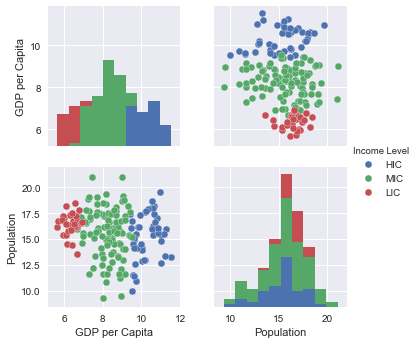

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue="Income Level")
plt.show()

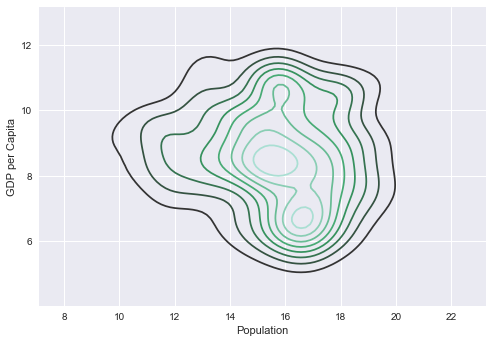

In [4]:
sns.kdeplot(df["Population"],df["GDP per Capita"])
plt.show()

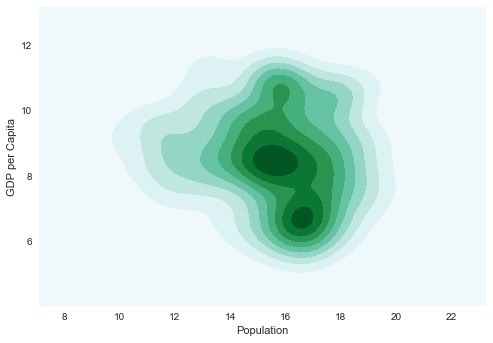

In [5]:
sns.kdeplot(df["Population"],df["GDP per Capita"],shade=True)
plt.show()

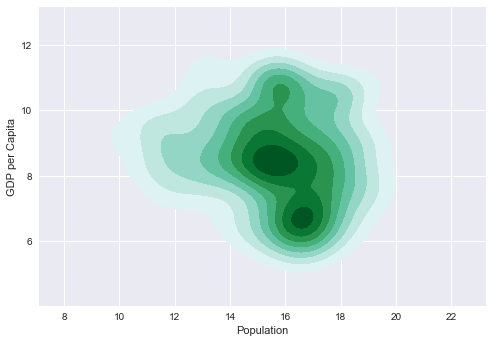

In [6]:
sns.kdeplot(df["Population"],df["GDP per Capita"],shade=True,shade_lowest=False)
plt.show()

In [7]:
HIC = df[df["Income Level"]=="HIC"]
MIC = df[df["Income Level"]=="MIC"]
LIC = df[df["Income Level"]=="LIC"]

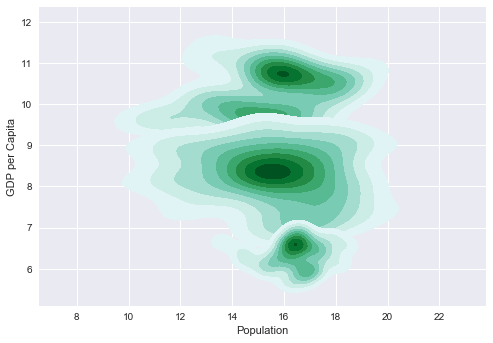

In [8]:
sns.kdeplot(HIC["Population"],HIC["GDP per Capita"],shade=True,shade_lowest=False)
sns.kdeplot(MIC["Population"],MIC["GDP per Capita"],shade=True,shade_lowest=False)
sns.kdeplot(LIC["Population"],LIC["GDP per Capita"],shade=True,shade_lowest=False)
plt.show()

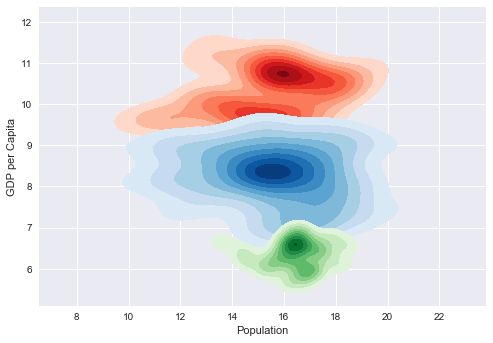

In [9]:
sns.kdeplot(HIC["Population"],HIC["GDP per Capita"],shade=True,shade_lowest=False,cmap="Reds")
sns.kdeplot(MIC["Population"],MIC["GDP per Capita"],shade=True,shade_lowest=False,cmap="Blues")
sns.kdeplot(LIC["Population"],LIC["GDP per Capita"],shade=True,shade_lowest=False,cmap="Greens")

plt.show()

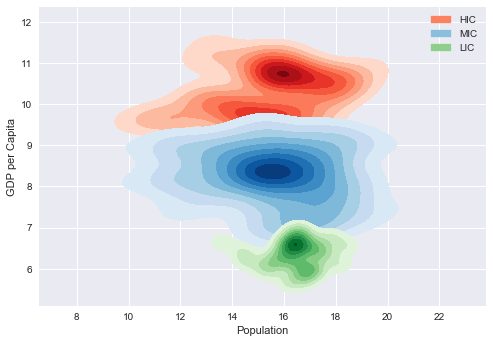

In [10]:
import matplotlib.patches as mpatches
hPlot = sns.kdeplot(HIC["Population"],HIC["GDP per Capita"],shade=True,shade_lowest=False,cmap="Reds")
mPlot = sns.kdeplot(MIC["Population"],MIC["GDP per Capita"],shade=True,shade_lowest=False,cmap="Blues")
lPlot = sns.kdeplot(LIC["Population"],LIC["GDP per Capita"],shade=True,shade_lowest=False,cmap="Greens")

r = sns.color_palette("Reds")[2]
b = sns.color_palette("Blues")[2]
g = sns.color_palette("Greens")[2]

red_patch = mpatches.Patch(color=r, label='HIC')
blue_patch = mpatches.Patch(color=b, label='MIC')
green_patch = mpatches.Patch(color=g, label='LIC')

plt.legend(handles=[red_patch,blue_patch,green_patch])

plt.show()